# Project Foundations for Data Science: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib widget
%matplotlib inline
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
len(df[df['day_of_the_week']=='Weekend'])

1351

In [5]:
# get the dimension of the dataset
df.shape

(1898, 9)

#### Observations:
1899 rows and 9 columns are present in the data

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
#provides information about the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The datatypes present are: int64, object and float64

* The data contains three different data types: int64, float64, and object, representing integer and float numerical variables, and categorical variables, respectively.<br>
* There are five numerical columns in the data: order_id, customer_id, cost_of_the_order, food_preparation_time, and delivery_time.<br>
* The remaining columns in the data are categorical variables: restaurant_name, cuisine_type, day_of_the_week, and rating.<br>
* Interestingly, rating is a categorical variable in this dataset, which suggests that there might be some non-numerical entries or other issues with the data in this column.<br>

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
#checks whether the DataFrame contains any missing values
df.isnull().values.any()

False

In [8]:
# Checking the missing values further
df.rating.value_counts(normalize = True, dropna = False)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations:
* The **Missing value(s)** is/are any **particular cell(s)** in the dataset which is/are **blank** i.e. the information is missing. 

* The output of the above code (False) implies that **there are no missing values in the data**.<br>
* The percentage of Not given values is close to the percentage of the rating '5' category.<br>
We can treat the Not given values as a separate category for this variable.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# provides a statistical summary of the DataFrame
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Based on these statistics, we can see that the orders range in cost from 4.47 to 35.41 dollars, take between 20 and 35 minutes to be prepared, and take between 15 and 33 minutes to be delivered. The mean cost of an order is 16.50 dollars, the mean food preparation time is 27.37 minutes, and the mean delivery time is 24.16 minutes. The standard deviation of the cost, food preparation time, and delivery time columns indicate how much variation there is in those values across the dataset.

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# returns an array of unique values in the 'rating' column of the DataFrame 
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [11]:
len(df[df.rating=='Not given'])

736

#### Observations:
* There are four unique values in rating which are: Not given, 5, 3, 4.<br> 
* However, there are 736 orders that are not rated having the 'Not given' label.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

In [12]:
from matplotlib.ticker import MultipleLocator

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red', showfliers=True)
       
    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    tick_interval = 1  # You can change this value to set the desired interval between ticks
    ax_box.xaxis.set_major_locator(MultipleLocator(tick_interval))

    
    plt.show()

### Observations on cost of the order

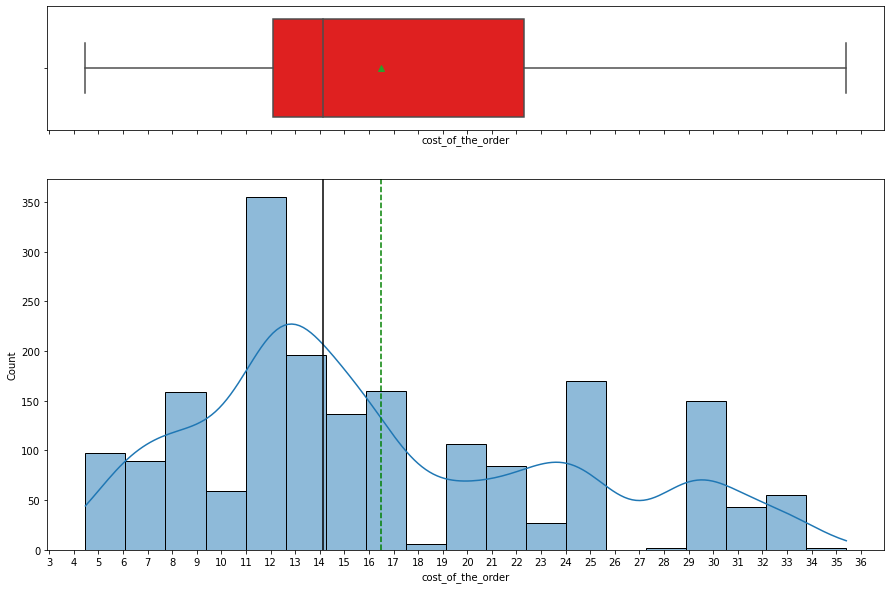

In [13]:
histogram_boxplot(df.cost_of_the_order)

**Observations:**
* The data for the cost_of_the_order variable appears to be right-skewed, indicating that there are some high-cost orders in the dataset.
* The majority of the orders fall within the range of 11 to 12.58 dollars.
* The median cost of the order is approximately 14 dollars, which is lower than the mean value of around 16.5 dollars. This suggests that there might be some high-cost orders that are driving up the mean value.
* There do not appear to be any outliers in the cost_of_the_order variable, which suggests that the data is relatively consistent and reliable.

### Observations on food preparation time

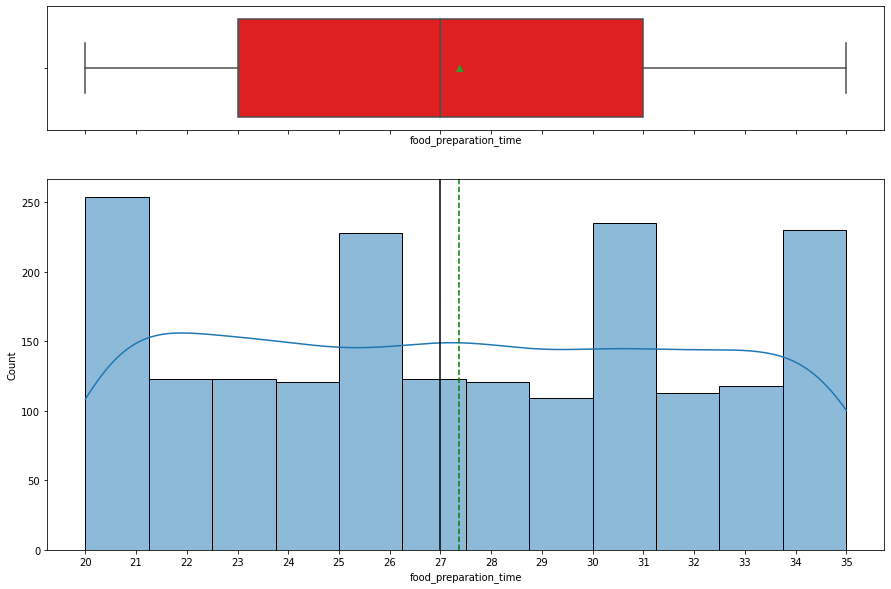

In [14]:
histogram_boxplot(df.food_preparation_time)

**Observations:**
* The mean value for the food_preparation_time variable is 27.37 minutes, which is only slightly greater than the median value of 27 minutes. This suggests that the distribution of food preparation times is uniform and has negligible right-skewness.
* The majority of the meals take between 20 to 21.05 minutes to be prepared.
* The minimum time for food preparation is 20 minutes, while the maximum time is 35 minutes. This suggests that the range of food preparation times is relatively narrow.
* There is a relatively uniform count of food preparation times across the dataset, with most counts falling between 110 to 120, and only a few occurrences of counts around 220 to 250. This suggests that there is a roughly equal number of people who prefer fast food (which takes less time to prepare) and those who prefer a well-prepared meal (which takes more time).
* There do not appear to be any outliers in the food_preparation_time variable, which suggests that the data is relatively consistent and reliable.

### Observations on Delivery time

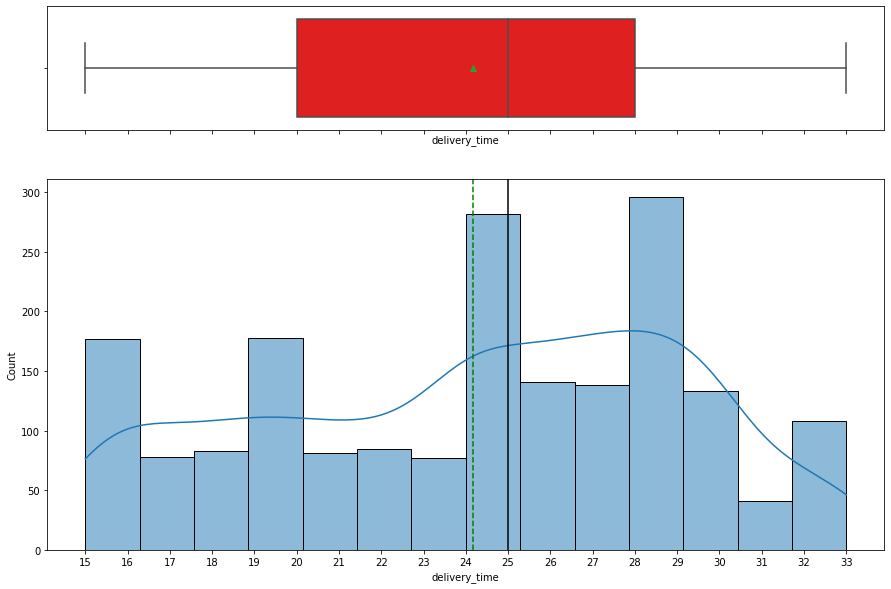

In [15]:
histogram_boxplot(df.delivery_time)

**Observations:**
* The median value for the delivery_time variable is 25, which is greater than the mean value of around 24. This suggests that the distribution of delivery times is left-skewed.
* The average delivery time is approximately 24 minutes.
* The majority of the delivery times fall within the range of 28 to 29 minutes.
* The minimum delivery time is 15 minutes, while the maximum delivery time is 33 minutes. This suggests that the range of delivery times is relatively narrow.
* There do not appear to be any outliers in the delivery_time variable, which suggests that the data is relatively consistent and reliable.






**Categorical variables**

In [16]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    plt.xticks(rotation=45)
    
#     Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

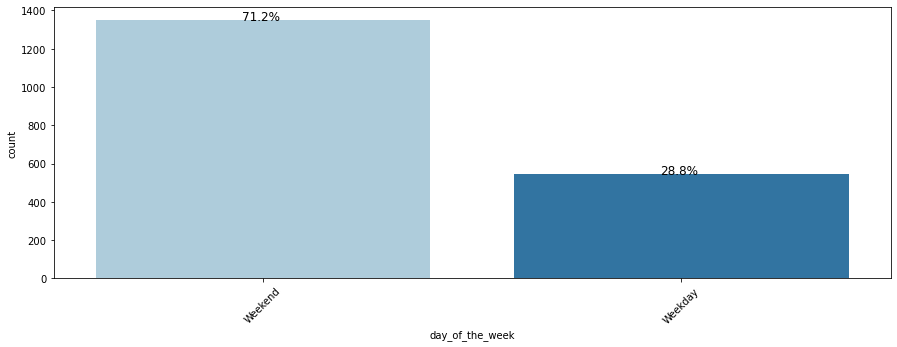

In [17]:
bar_perc(df, 'day_of_the_week')

**Observations:**
* There are two categories of weekdays: Weekend and Weekday.
* 71.2% of orders were made on weekends while 28.8% were made during weekdays. 

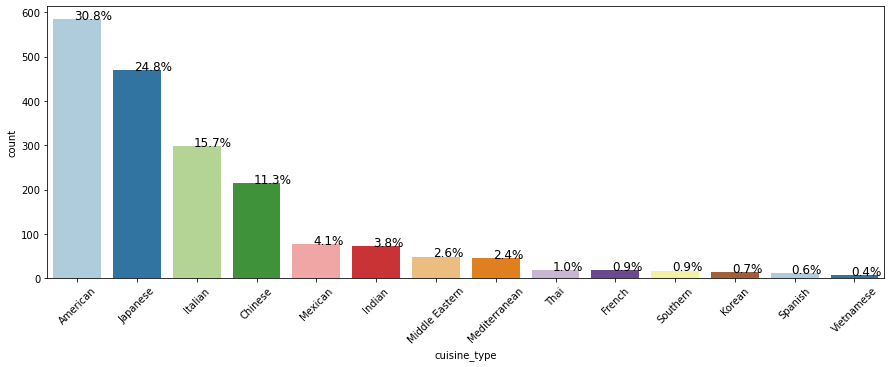

In [18]:
bar_perc(df, 'cuisine_type')

**Observations**
* There are 14 cuisine types in the dataset.
* American cuisine (30.8%) followed by Japanese cuisine (24.8%) are the most frequently ordered, accounting for more than 50% of all cuisine types. It is expected that American cuisine is the most commonly ordered, given that the study location is New York. However, this also indicates a diverse range of food menus available in New York, reflecting the intercultural diversity of the city.

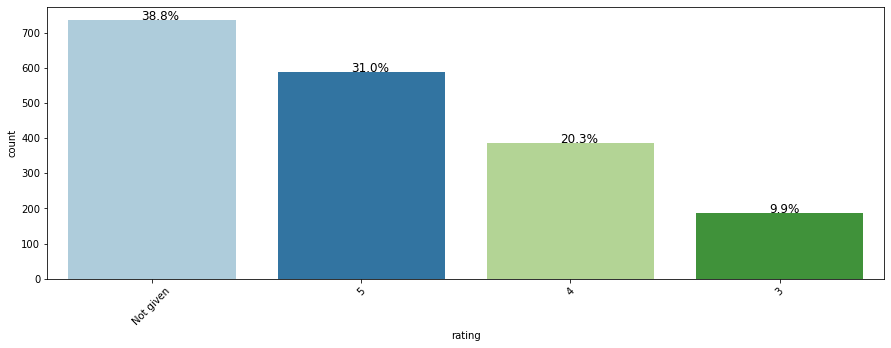

In [19]:
bar_perc(df, 'rating')

**Observation**
* The distribution of ratings in the dataset shows that 38.8% of the entries have a 'Not given' rating, while 31.0% have a rating of 5, 20.3% have a rating of 4, and 9.9% have a rating of 3.
* The Not given(38.8%), is significant and can not be dropped.
* The percentage of Not given is close to the percentage of some labels from ratings.
* We can treat the Not given values as a separate category for this variable.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
df.restaurant_name.value_counts().head().reset_index().rename(columns 
                                        = {'index':'restaurant_name',
                                        'restaurant_name':'number of orders'})

,restaurant_name,number of orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
* Shake Shack received the highest number of orders (219), followed by The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), and Parm (68).
* It is worth noting that these numbers may not reflect the quality or popularity of the restaurants, as other factors such as location, marketing, and pricing can also influence the number of orders received.
* However, this information can be useful for understanding which restaurants are more in demand and for making data-driven decisions related to supply chain management, inventory, and staffing.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Select only the rows where the day_of_the_week column is 'Weekend',
# and the columns 'cuisine_type' and 'day_of_the_week'.
cuisine = df[df['day_of_the_week'] == 'Weekend'][['cuisine_type','day_of_the_week']]

# Calculate the mode of the 'cuisine_type' column in the 'cuisine' DataFrame,
# which represents the most frequently occurring cuisine type on weekends.
most_popular_cuisine = cuisine['cuisine_type'].mode()

# Check if there is a mode for the cuisine type on weekends.
# If there is, print out the most popular cuisine type.
# If there is no mode, print out a message indicating so.
if len(most_popular_cuisine) > 0:
    print('The most popular cuisine on weekends is:', most_popular_cuisine[0])
else:
    print('There is no mode for the cuisine type on weekends.')


The most popular cuisine on weekends is: American


#### Observations:
The most popular cuisine on weekends is: American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [22]:
# Convert the 'cost_of_the_order' column to a float and create a new DataFrame 'd'
# that only contains the cost values and their indices.
d = df['cost_of_the_order'].astype('float').reset_index().drop(['index'], axis = 1)

# Select only the rows where the cost is greater than 20 dollars.
d = d[d['cost_of_the_order']>20]

# Calculate the length of the resulting DataFrame 'd' and the original DataFrame 'df'.
len_d = len(d)
len_df = len(df.cost_of_the_order)

# Compute the percentage of orders with a cost greater than 20 dollars.
perc = (len_d/len_df) * 100
perc

29.24130663856691

#### Observations:
Approximately 29 percentage of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# finds the mean
df.delivery_time.mean()

24.161749209694417

#### Observations:
24.16 minutes is the mean order delivery time

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Count the number of orders for each customer and select the top 3 customers.

top_customers = df.customer_id.value_counts().head(3)

# Convert the resulting Series to a DataFrame, reset the index,
# and rename the columns to match the output format.
result_df = top_customers.reset_index().rename(columns={'index':'customer_id',
                                                        'customer_id':'number_of_orders'})
result_df

,customer_id,number_of_orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:
The top 3 most frequent customers are with id(s): 52832, 47440, 83287.<br>
customer 52832 has 13 orders, customer 47440 has 10 orders  and customer 83287 has 9 orders.

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


### Multivariate analysis between numerical variables

### Correlation

<AxesSubplot:>

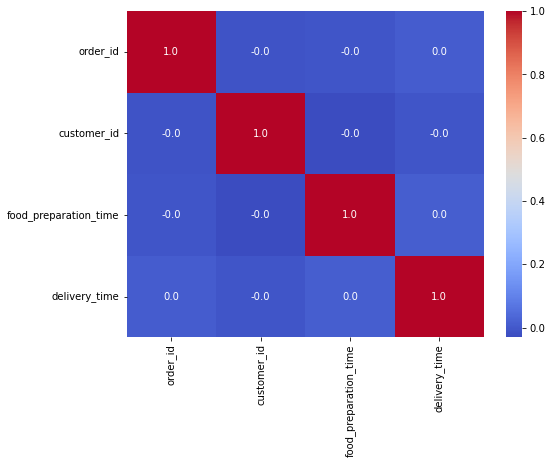

In [25]:
# Check for correlation among numerical variables
num_var = ['order_id', 'customer_id', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',            
        fmt = ".1f",            
        xticklabels = corr.columns,            
        yticklabels = corr.columns)

**Observations**
* The order_id and customer_id columns are just unique identifiers and have no relationship with the other columns in the dataset. 
* Delivery_time and food_preparation_time are not correlated.

### Line Plots

#### Cost of the order across food preparation time

Text(0.5, 1.0, 'Mean cost of orders')

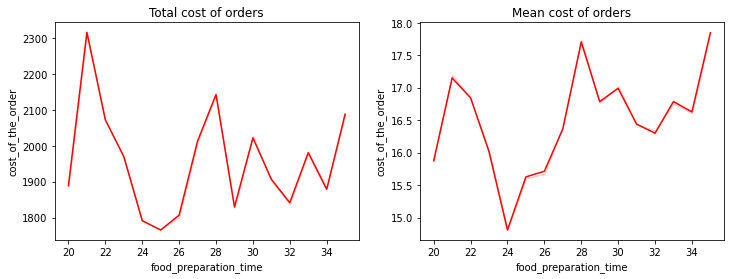

In [26]:
f, (ax_sum, ax_mean) = plt.subplots(ncols=2, gridspec_kw={"width_ratios": (0.5,0.5)},
        figsize=(12,4))

sns.lineplot(x = "food_preparation_time", y = "cost_of_the_order", 
             data = df, ax = ax_sum, ci = 0, color = "RED", estimator = 'sum')
ax_sum.set_title('Total cost of orders')

sns.lineplot(x= "food_preparation_time", y = "cost_of_the_order", 
             data = df, ax = ax_mean, ci = 0, color = "RED", estimator = 'mean')
ax_mean.set_title('Mean cost of orders')

**Observations**
* Using sum as estimator, the overall cost of the order reduces generally with food preparation time
* Using mean as estimator, the average cost of the order increases generally with food preparation time

#### Delivery time across day of the week

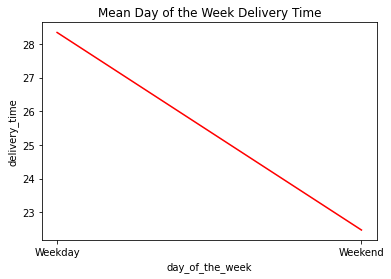

In [27]:
sns.lineplot(x = "day_of_the_week", y = "delivery_time", data = df, ci = 0, color = "RED", estimator = 'mean')
plt.title('Mean Day of the Week Delivery Time')
plt.show()

**Observations**
* Delivery takes longer during weekdays than during weekend

### Numerical and Categorical

#### Bar Plots

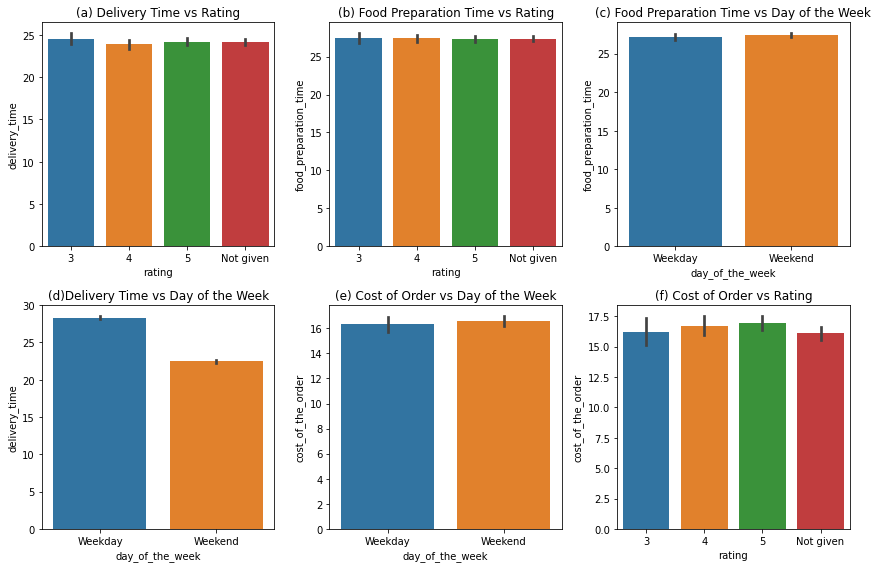

In [28]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Create the first bar plot on the top-left subplot
sns.barplot(x='rating', y='delivery_time', data=df, ax=axes[0, 0])
axes[0, 0].set_title('(a) Delivery Time vs Rating')

# Create the second bar plot on the top-middle subplot
sns.barplot(x='rating', y='food_preparation_time', data=df, ax=axes[0, 1])
axes[0, 1].set_title('(b) Food Preparation Time vs Rating')

# Create the third bar plot on the top-right subplot
sns.barplot(x='day_of_the_week', y='food_preparation_time', data=df, ax=axes[0, 2])
axes[0, 2].set_title('(c) Food Preparation Time vs Day of the Week')

# Create the fourth bar plot on the bottom-left subplot
sns.barplot(x='day_of_the_week', y='delivery_time', data=df, ax=axes[1, 0])
axes[1, 0].set_title('(d)Delivery Time vs Day of the Week')

# Create the fifth bar plot on the bottom-middle subplot
sns.barplot(x='day_of_the_week', y='cost_of_the_order', data=df, ax=axes[1, 1])
axes[1, 1].set_title('(e) Cost of Order vs Day of the Week')

# Create the sixth bar plot on the bottom-right subplot
sns.barplot(x='rating', y='cost_of_the_order', data=df, ax=axes[1, 2])
axes[1, 2].set_title('(f) Cost of Order vs Rating')

# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Display the plot
plt.show()


**Observations**
* The data in plot (a) suggests that a shorter delivery time does not necessarily guarantee a higher rating of 5. In fact, across all categories of rating, the delivery time appears to be roughly the same.

* The data in plot (b) shows a similar trend to plot (a), in that a shorter food preparation time does not necessarily lead to a higher rating of 5. Again, the food preparation times across all categories of rating are relatively similar.

* Plot (c) demonstrates that food preparation times are slightly longer on weekends compared to weekdays.

* Plot (d) indicates that delivery times are shorter on weekends than weekdays.

* Plot (e) suggests that the cost of an order is slightly higher on weekends than weekdays.

* Finally, plot (f) shows that orders with the highest cost tend to have the highest rating.

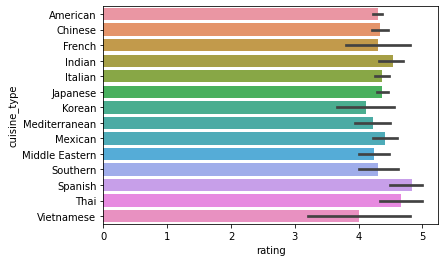

In [29]:
# Change the rating column to a numeric datatype
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
#plot
sns.barplot(x=df.rating, y=df.cuisine_type, data=df)
plt.show()

**Observation**
* The data indicates that Spanish cuisine has the highest average rating among the cuisines considered, which is somewhat surprising given that the area being analyzed is New York, where American cuisine might be expected to have a higher rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1162 non-null   float64 
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(2), float64(2), int64(4), object(1)
memory usage: 108.4+ KB


In [31]:
df['rating'].dtypes

dtype('float64')

In [41]:
# Convert the 'rating' column to a numeric data type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Get the count of restaurants with each rating, and rename the count column
count = df[['restaurant_name', 'rating']].value_counts().reset_index().rename(columns={0: 'count'})

# Filter the DataFrame for rows with a count greater than 50 and a rating greater than 4
filtered_df = count[count['count'] > 50]
filtered_df = filtered_df[filtered_df['rating'] > 4]

# Print the filtered DataFrame
print(filtered_df)


     restaurant_name  rating  count
0        Shake Shack     5.0     60
1  The Meatball Shop     5.0     53


In [32]:
# gets the count and rename
count = df[['restaurant_name','rating']].value_counts().reset_index().rename(columns
                                                                             ={0:'count'})

# Convert the 'rating' column to a numeric data type
# count['rating'] = pd.to_numeric(count['rating'], errors='coerce')

# Filter the DataFrame for rows with a rating greater than 4
filtered_df = count[count['count'] > 50]
filtered_df[filtered_df['rating']>4]

,restaurant_name,rating,count
0,Shake Shack,5.0,60
1,The Meatball Shop,5.0,53


#### Observations:
There are two restaurants with count above 50 and average rating above 4. <br>
They are: Shake Shack and The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [33]:
# Calculate the revenue generated from each order
revenue = []
for cost in df['cost_of_the_order']:
    if cost > 20:
        revenue.append(cost * 0.25)
    elif cost > 5:
        revenue.append(cost * 0.15)
    else:
        revenue.append(0)

# Calculate the net revenue generated by summing up the revenue from all orders
net_revenue = sum(revenue)

# Print the net revenue
print("Net revenue generated by the company: $", round(net_revenue, 2))


Net revenue generated by the company: $ 6166.3


#### Observations:
For orders having a cost greater than $20 , the company charges 25%. Therefore, the revenue generated from these orders will be 25% of the cost of the order.

For orders having a cost greater than 5 dollars , but less than or equal to 20 dollars,  the company charges 15%. Therefore, the revenue generated from these orders will be 15% of the cost of the order.

For orders having a cost less than or equal to $5, the company does not charge anything.

We can calculate the net revenue by summing up the revenue generated from all orders.
The sum is $6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [34]:
print('maximum time to prepare food:', df.food_preparation_time.max(),'minutes')
print('maximum time to deliver food:', df.delivery_time.max(),'minutes')
print('mean food preparation time:', df.food_preparation_time.mean(),'minutes')
print('mean delivery time:', df.delivery_time.mean(),'minutes')

maximum time to prepare food: 35 minutes
maximum time to deliver food: 33 minutes
mean food preparation time: 27.371970495258168 minutes
mean delivery time: 24.161749209694417 minutes


In [35]:


# Calculate the total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes
num_orders_greater_than_60 = len(df[df['total_time'] > 60])
total_num_orders = len(df)
percentage_greater_than_60 = (num_orders_greater_than_60 / total_num_orders) * 100

# Print the percentage of orders that take more than 60 minutes
print('number of orders > 60:',num_orders_greater_than_60)
print('Total number of orders:',total_num_orders)
print("Percentage of orders that take more than 60 minutes: ", round(percentage_greater_than_60, 2), "%")


number of orders > 60: 200
Total number of orders: 1898
Percentage of orders that take more than 60 minutes:  10.54 %


#### Observations:
* The maximum time to prepare food is 35 minutes.<br>
* Maximum time to deliver food is 33 minutes.<br>
* Mean food preparation time is 27.37 minutes.<br>
* Mean delivery time is 24.16 minutes.<br>

* The total number of orders made is 1898 in total.<br>
* The number of orders greater than 60 minutes is 200.<br>
* Therefore 10.54% took more than 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [36]:
# Group the orders by day of the week and calculate the mean delivery time
grouped_data = df.groupby('day_of_the_week')['delivery_time'].mean()

# Print the mean delivery time for weekdays and weekends
print("Mean delivery time for weekdays: ", round(grouped_data.loc['Weekday'], 2), "minutes")
print("Mean delivery time for weekends: ", round(grouped_data.loc['Weekend'], 2), "minutes")


Mean delivery time for weekdays:  28.34 minutes
Mean delivery time for weekends:  22.47 minutes


In [37]:
# Calculate the mean and standard deviation of the delivery time for weekdays and weekends
weekday_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time']
weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time']
mean_weekday = np.mean(weekday_delivery_time)
mean_weekend = np.mean(weekend_delivery_time)
std_weekday = np.std(weekday_delivery_time)
std_weekend = np.std(weekend_delivery_time)

# Calculate the coefficient of variation for the delivery time on weekdays and weekends
cv_weekday = std_weekday / mean_weekday
cv_weekend = std_weekend / mean_weekend

# Print the coefficient of variation for the delivery time on weekdays and weekends
print("Coefficient of variation for delivery time on weekdays: ", round(cv_weekday, 2))
print("Coefficient of variation for delivery time on weekends: ", round(cv_weekend, 2))


Coefficient of variation for delivery time on weekdays:  0.1
Coefficient of variation for delivery time on weekends:  0.21


#### Observations:
The coefficient of variation for delivery time on weekdays is 0.1 and the coefficient of variation for delivery time on weekends is 0.21. This indicates that the delivery time on weekends is more variable compared to weekdays. A higher coefficient of variation means that the data has more variation relative to its mean, while a lower coefficient of variation means that the data is more tightly clustered around the mean.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

### Conclusions:
*  American and Japanese cuisines are the most popular, accounting for over 50% of all orders.
* There is no strong relationship between delivery time, food preparation time, and customer ratings, indicating that other factors beyond totaltime taken may influence customer satisfaction.
* Shake Shack and The Meatball Shop are two popular restaurants with high order counts and average ratings above 4.
* Delivery time and food preparation time vary between weekdays and weekends, which can influence customer experience.
* The net revenue generated by the company is $6166.3, with different percentages charged based on the cost of the order. 
* It is important to note that 10.54% of the orders take more than 60 minutes to be prepared and delivered, indicating potential areas for improvement in the food delivery process.

### Recommendations:

*  Focus on popular cuisines: Expand menu offerings in American and Japanese cuisines to cater to customer preferences. Introduce new dishes, seasonal specials, or limited-time promotions to attract more customers and increase sales.

* Monitor feedback for less popular cuisines: Analyze customer feedback and ratings for less frequently ordered cuisines to identify areas for improvement. Address these concerns and promote unique aspects of these cuisines to increase their appeal and grow market share.

* Maintain and improve high ratings especially the spanish cuisine type: Regularly monitor feedback ratings and address any negative feedback or recurring issues. Invest in employee training, quality control, and implement processes to ensure a consistent, high-quality customer experience.

* Leverage positive feedback: Use high ratings and positive customer feedback as a marketing tool to attract new customers. Share testimonials, highlight positive reviews on social media, and showcase popular dishes to increase brand visibility.

* Diversify cuisine offerings: Consider diversifying menu offerings by researching market trends and exploring new or emerging cuisines. Cater to a broader customer base and stay ahead of the competition by offering unique dining experiences.

* Collaborate with popular restaurants: Partner or collaborate with popular establishments like Shake Shack and The Meatball Shop for co-branded promotions, special menus, or exclusive events to increase brand visibility and attract new customers.



---